# K-Means Clustering  

### Apa Itu K-Means Clustering?  

Teknik pengelompokan (clustering) berbasis partisi membagi data menjadi K kelompok berdasarkan jarak setiap kelompok direpresentasikan oleh centroid (rata-rata dari titik dalam kluster).  

### Mengapa Perlu Clustering?  

Data sering kali tidak memiliki label → Unsupervised Learning clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik.  

### Tujuan dan Fungsi  

- Meminimalkan variasi dalam kluster (within-cluster variance)  
- Mengelompokkan objek sehingga:  
    - Objek dalam kluster sehomogen mungkin  
    - objek antar kluster seheterogen mungkin  

### Langkah-Langkah Algoritma K-Means  
1. Tentukan jumlah kluster K,

2. Pilih K centroid awal secara acak,

3. Hitung jarak setiap data ke tiap centroid,

4. Kelompokkan data berdasarkan centroid terdekat,

5. Hitung ulang centroid dari rata-rata anggota kluster,

6. Ulangi langkah 3–5 hingga konvergen (tidak ada perubahan signifikan).  

### Kelebihan  
- Cepat dan efisien  

- Mudah dipahami & diimplementasikan  

- Bekerja baik pada data besar  

- Hasil stabil jika inisialisasi bagus  

### Kekurangan  
- Harus menentukan nilai K di awal  

- Sensitif terhadap outlier  

- Dipengaruhi oleh skala dan dimensi data  

- Hanya cocok untuk bentuk kluster sferis  

### Evaluasi Hasil Klustering  
- Inertia: Jumlah kuadrat jarak antara titik dan centroid  

- Silhouette Score: Ukuran seberapa mirip suatu objek dengan klusternya dibanding kluster lain  

- Elbow Method: Untuk memilih nilai K optimal


# Implementasi K-Means Clustering

### Import libraries, load, & read dataset

import libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Loading & Read the Dataset

In [2]:
data = pd.read_csv('iris_dataset.csv')
print("Dataset loaded successfully")
data

Dataset loaded successfully


,id,sepal_length,sepal_width,petal_length,petal_width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Menghapus Class

In [3]:
X = data.iloc[:, :-1]   # Menghapus kolom terakhir (class)
X = X.drop(columns=['id'])  # Menghapus kolom 'id' dari X
y = data.iloc[:, -1]    # Kolom class
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

memisahkan (filter) dataset Iris berdasarkan class bunga

In [5]:
iris_setosa=data.loc[data["class"]=="Iris-setosa"]
iris_virginica=data.loc[data["class"]=="Iris-virginica"]
iris_versicolor=data.loc[data["class"]=="Iris-versicolor"]

### Pre-process data (Standardization data)

standardisasi fitur (feature scaling)

In [6]:
col_names = X.columns
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=col_names)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


menghitung nilai rata-rata (mean) dan standar deviasi (std)

In [7]:
print(np.mean(X['sepal_length']), np.std(X['sepal_length']))
print(np.mean(X['sepal_width']), np.std(X['sepal_width']))
print(np.mean(X['petal_length']), np.std(X['petal_length']))
print(np.mean(X['petal_width']), np.std(X['petal_width']))

-4.736951571734001e-16 1.0
-6.631732200427602e-16 0.9999999999999999
3.315866100213801e-16 0.9999999999999998
-2.842170943040401e-16 1.0


### Data Visualization   

In [8]:
X_plot = X.copy()
X_plot['class'] = y.values

plot setiap class bunga ke histogram

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/home/codesp

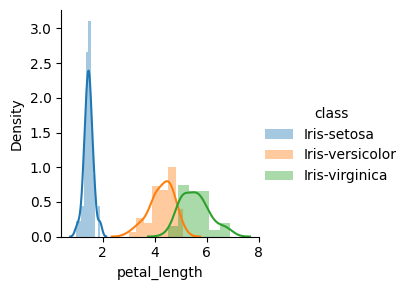

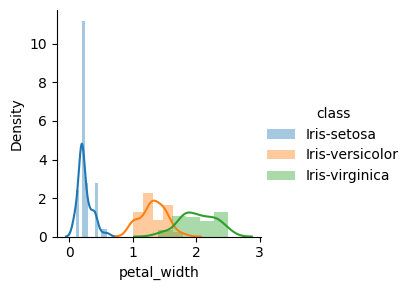

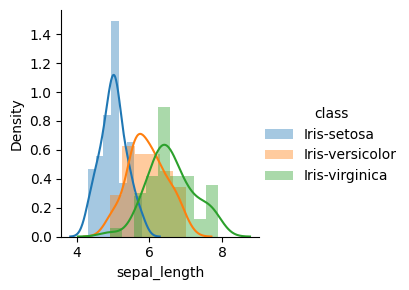

In [9]:
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_length").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "petal_width").add_legend()
sns.FacetGrid(data, hue="class", height=3).map(sns.distplot, "sepal_length").add_legend()

heatmap korelasi 

<Axes: >

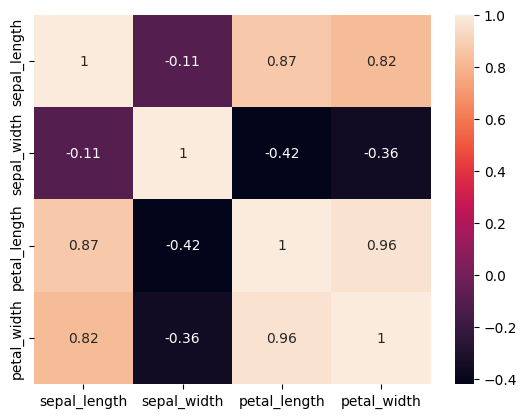

In [10]:
sns.heatmap(X.corr(),annot=True )

box plot

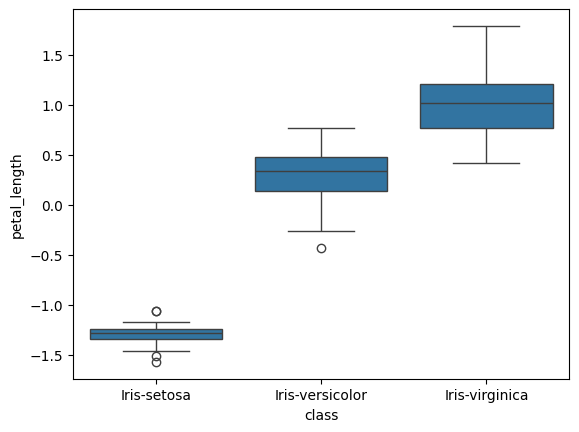

In [11]:
sns.boxplot(x="class", y="petal_length", data=X_plot)
plt.show()

violin plot

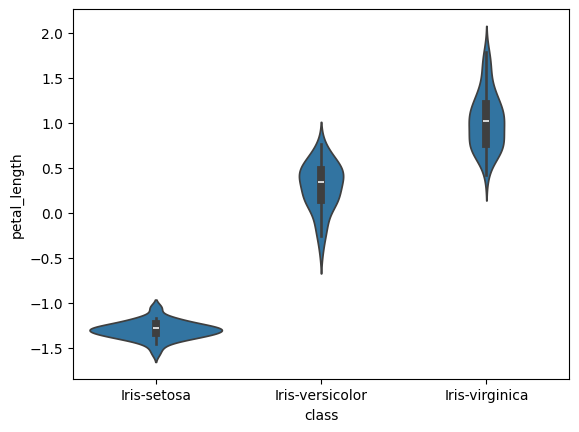

In [12]:
sns.violinplot(x="class",y="petal_length",data=X_plot)
plt.show()

Scatter plot

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


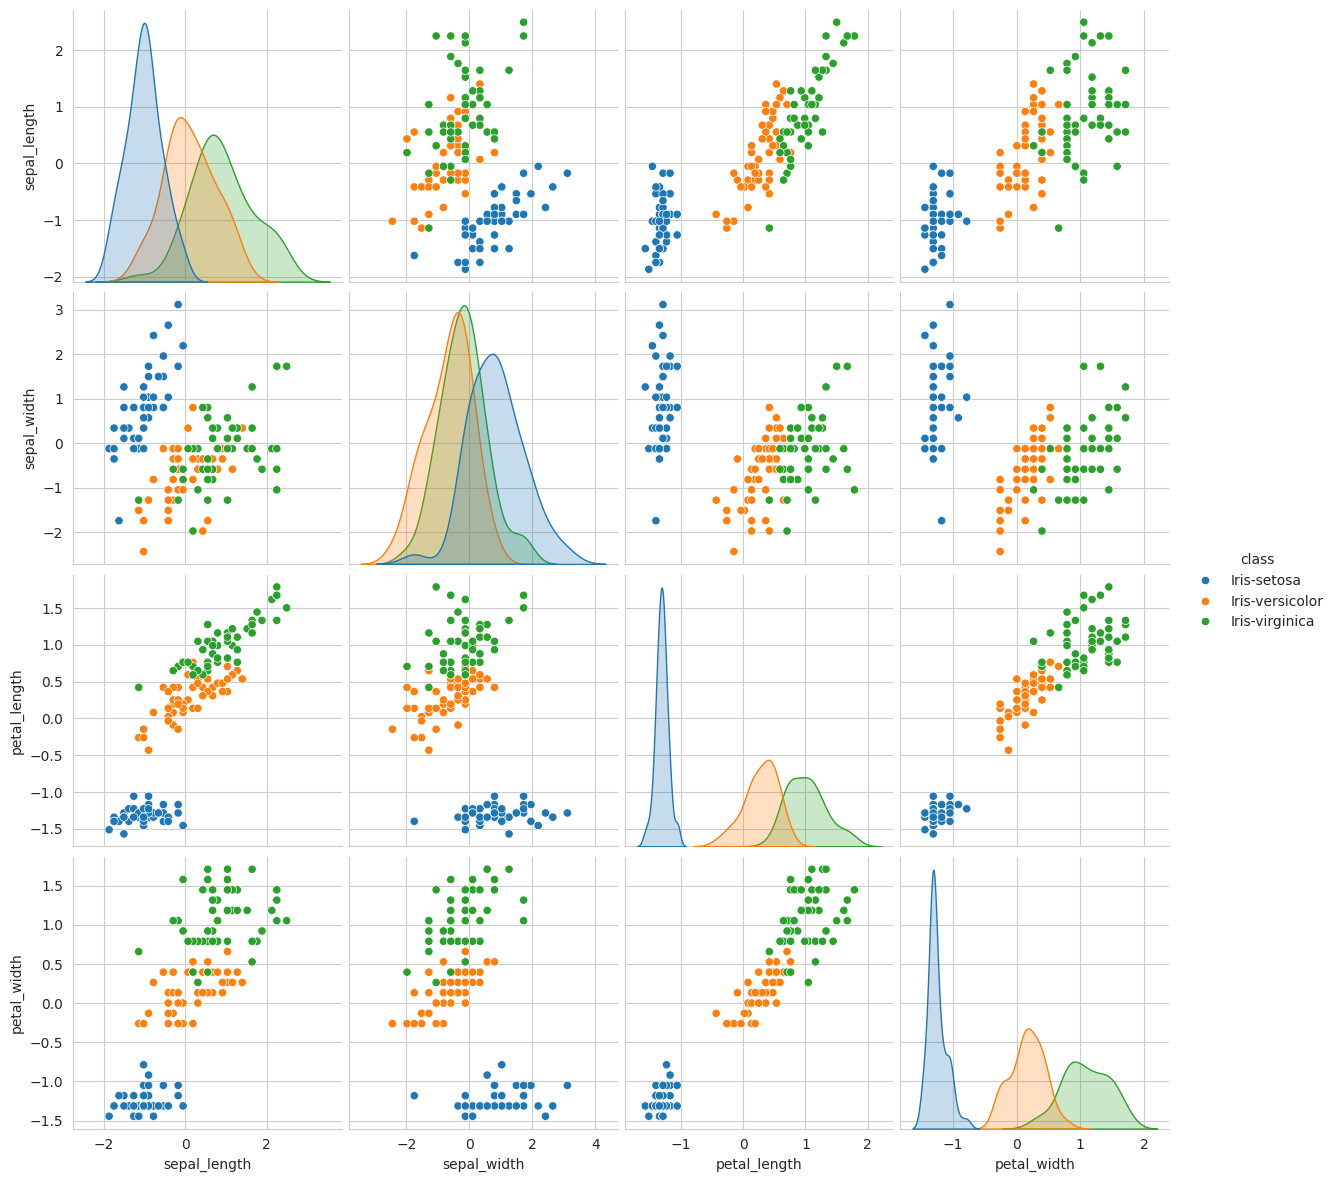

In [13]:
sns.set_style("whitegrid")
sns.pairplot(X_plot,hue="class",size=3);
plt.show()

# Modeling K-Means Clustering

### Clustering

Training data

In [14]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


visualisasi data clustering

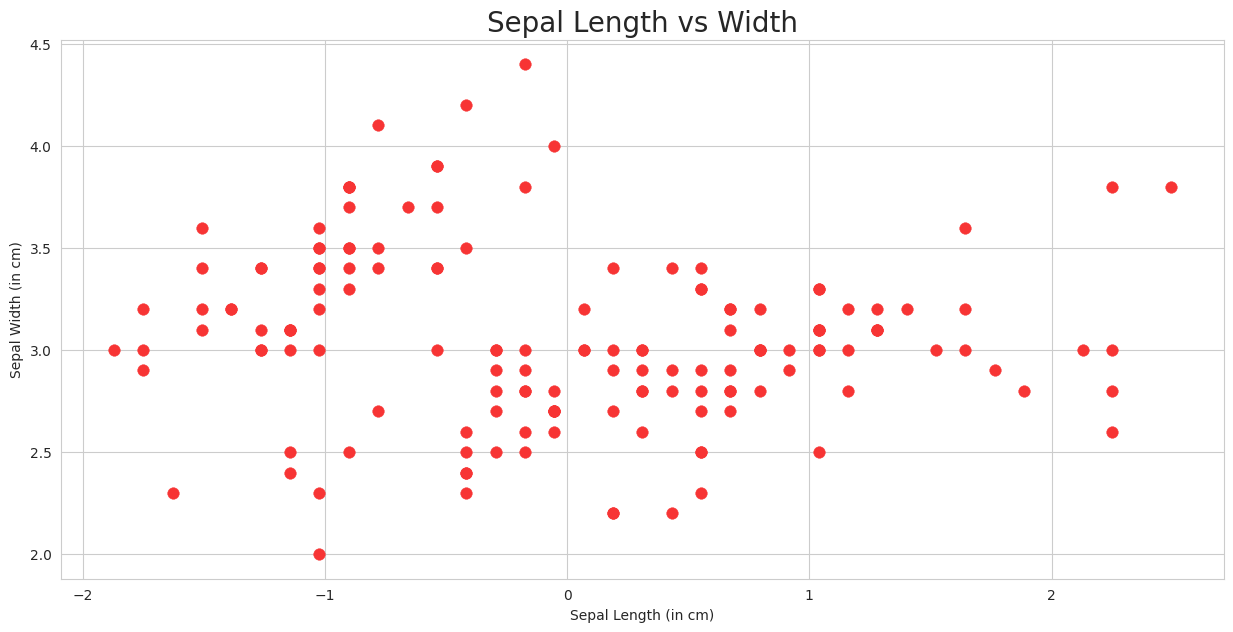

In [15]:
ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.5)
ax = sns.scatterplot(x=X['sepal_length'],y=data['sepal_width'], s=70, color='#f73434', edgecolor='#f73434', linewidth=0.3)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Sepal Length vs Width', fontsize = 20)
plt.show()

nilai sse untuk cluster 1-10

In [16]:
sse=[]

for i in range(1,11):
    km = KMeans(i)
    km.fit(X)
    sse.append(km.inertia_)

sse

[600.0000000000003,
 223.73200573676343,
 142.11063713104195,
 114.93521419827835,
 91.03697127893268,
 84.25961461763745,
 73.84487673392523,
 65.02975875240499,
 57.5933702454592,
 52.21149245099769]

Elbow Method untuk cluster 1-10

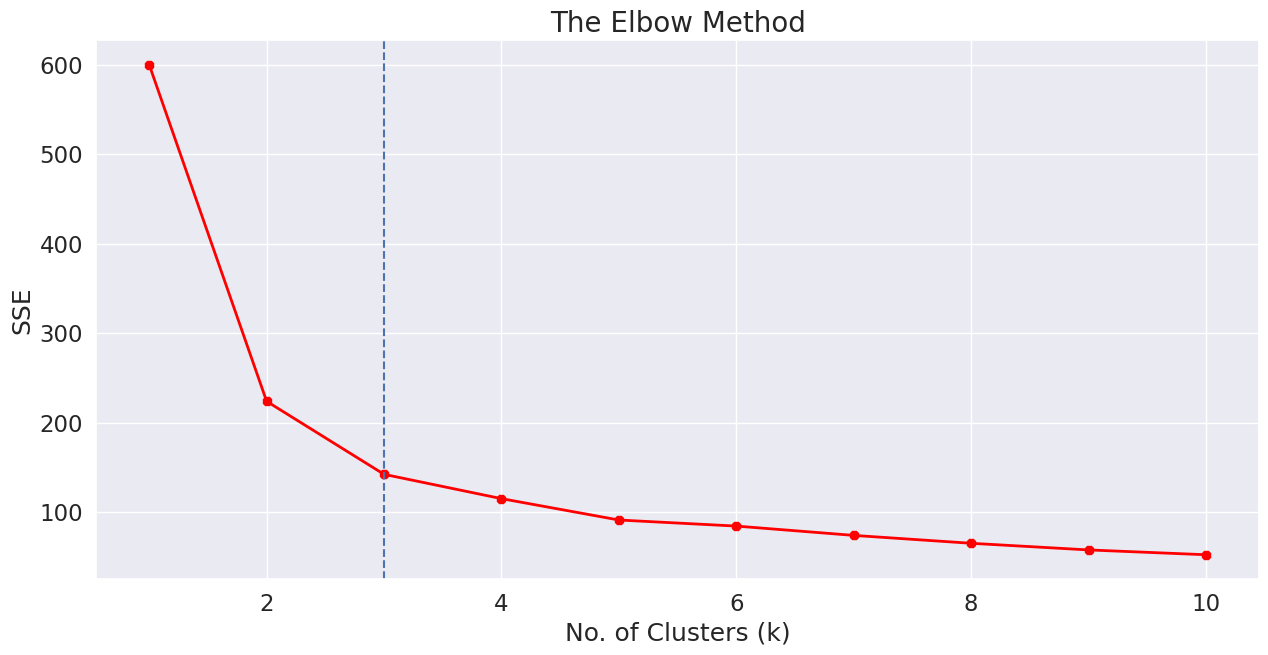

In [17]:
ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,11),sse, linewidth=2, color="red", marker ="8")
plt.axvline(x=3, ls='--')
plt.ylabel('SSE')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

nilai silhouette untuk cluster 1-10

In [18]:
silhouette_scores = []

for i in range(2, 11):
    km = KMeans(i)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(float(score))

silhouette_scores

[0.580184463257396,
 0.46214947389312017,
 0.4140182611396695,
 0.360748221776554,
 0.33356756097514456,
 0.33587984259424974,
 0.33267060886097,
 0.2663328300851727,
 0.3390289783380452]

### Uji coba Clustering menggunakan 2 Centroid

In [19]:
data = pd.read_csv("iris_dataset.csv")
print(data.head())

   id  sepal_length  sepal_width  petal_length  petal_width        class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
X = df.drop(columns=["class", "id"]).values
print(X)

NameError: name 'df' is not defined

In [79]:
col_names = X.columns

# Normalisasi data (menggunakan StandardScaler)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=col_names)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

Menentukan centroid cluster

In [7]:
X_for_clustering = X_standardized.copy()

# Inisialisasi K-Means dengan 2 cluster
kms = KMeans(
    n_clusters=2,
    random_state=0,
    n_init="auto",
    max_iter=300,
    tol=0.0001,
    algorithm="lloyd"
)

# Fit dan prediksi cluster
clusters = kms.fit_predict(X_for_clustering)

data_with_cluster = X.copy() 
data_with_cluster['Cluster'] = clusters

print("Data dengan Hasil Clustering:")
data_with_cluster.head()

Data dengan Hasil Clustering:


,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


menyimpan koordinat centroid (pusat) setiap klaster

In [29]:
kms.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.50728948, -0.4211534 ,  0.65243918,  0.62756431]])

 visualisasi hasil clustering menggunakan 2 centroid

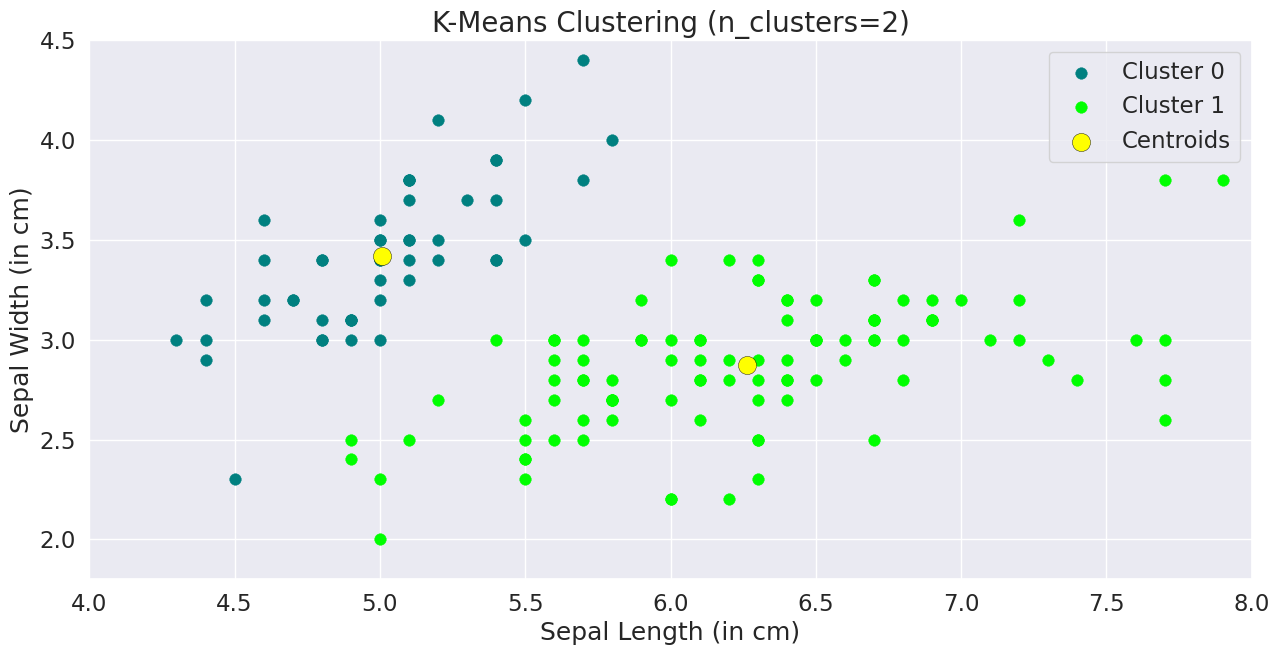

In [32]:
fig, ax = plt.subplots(figsize=(15,7)) 

# Scatter plot for Cluster 0
plt.scatter(x=data_with_cluster[data_with_cluster['Cluster'] == 0]['sepal_length'],
            y=data_with_cluster[data_with_cluster['Cluster'] == 0]['sepal_width'],
            s=70, edgecolor='teal', linewidth=0.3, c='teal', label='Cluster 0')

# Scatter plot for Cluster 1
plt.scatter(x=data_with_cluster[data_with_cluster['Cluster'] == 1]['sepal_length'],
            y=data_with_cluster[data_with_cluster['Cluster'] == 1]['sepal_width'],
            s=70, edgecolor='lime', linewidth=0.3, c='lime', label='Cluster 1')

# Plot centroids (note we use the original feature space centroids, not PCA space)
# We need to inverse transform the centroids if we used scaling
centers_original = scaler.inverse_transform(kms.cluster_centers_)
plt.scatter(x=centers_original[:, 0], y=centers_original[:, 1], 
            s=170, c='yellow', label='Centroids',
            edgecolor='black', linewidth=0.3)

plt.legend(loc='upper right')
plt.xlim(4, 8)
plt.ylim(1.8, 4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('K-Means Clustering (n_clusters=2)', fontsize=20)
plt.grid(True)
plt.show()

nilai sse dengan 2 centroid

In [33]:
sse = kms.inertia_
sse

223.73200573676343

nilai Silhouette Score dengan 2 centroid

In [35]:
silhouette_avg = silhouette_score(X_for_clustering, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.580184463257396


### Uji coba Clustering menggunakan 3 Centroid

Menentukan centroid cluster

In [76]:
X_for_clustering = X_standardized.copy()

# Inisialisasi K-Means dengan 3 cluster
kms = KMeans(
    n_clusters=3,
    random_state=0,
    n_init="auto",
    max_iter=300,
    tol=0.0001,
    algorithm="lloyd"
)

# Fit dan prediksi cluster
clusters = kms.fit_predict(X_for_clustering)

data_with_cluster = X.copy() 
data_with_cluster['Cluster'] = clusters

print("Data dengan Hasil Clustering:")
data_with_cluster.head()

Data dengan Hasil Clustering:


,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


menyimpan koordinat centroid (pusat) setiap klaster

In [77]:
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 2 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 2
 2 2]


In [70]:
kms.cluster_centers_

array([[-0.07723421, -0.92778421,  0.32291983,  0.23786769],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 1.06889068,  0.06560955,  0.9690362 ,  1.00197871]])

 visualisasi hasil clustering menggunakan 3 centroid

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

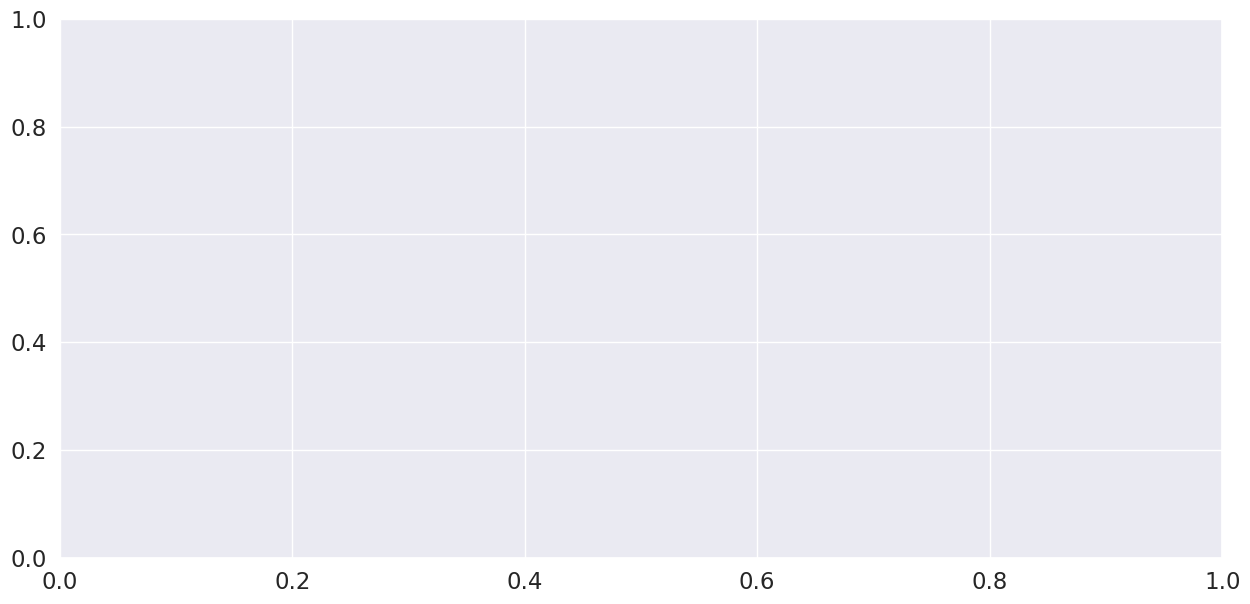

In [71]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

nilai sse dengan 3 centroid

In [158]:
sse = kms.inertia_
sse

78.94506582597728

nilai Silhouette Score dengan 3 centroid

In [159]:
cluster_labels = kms.predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5509643746707443


### Uji coba Clustering menggunakan 4 Centroid

Menentukan centroid cluster

In [160]:
kms = KMeans(n_clusters=4, random_state=0, n_init="auto", max_iter=300, tol=0.0001, verbose=0,copy_x=True,algorithm="lloyd")
kms.fit(X)

clusters = X.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(X)
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster_Prediction
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [164]:
print("Hasil label cluster:", kms.labels_)

Hasil label cluster: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 3 0 3 0 3 0 0 0 0 3 0 3 0 0 3 0 3 0 3 3
 3 3 3 3 3 0 0 0 0 3 0 3 3 3 0 0 0 3 0 0 0 0 0 3 0 0 2 3 2 2 2 2 0 2 2 2 3
 3 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 3
 2 3]


menyimpan koordinat centroid (pusat) setiap klaster

In [165]:
kms.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

 visualisasi hasil clustering menggunakan 4 centroid

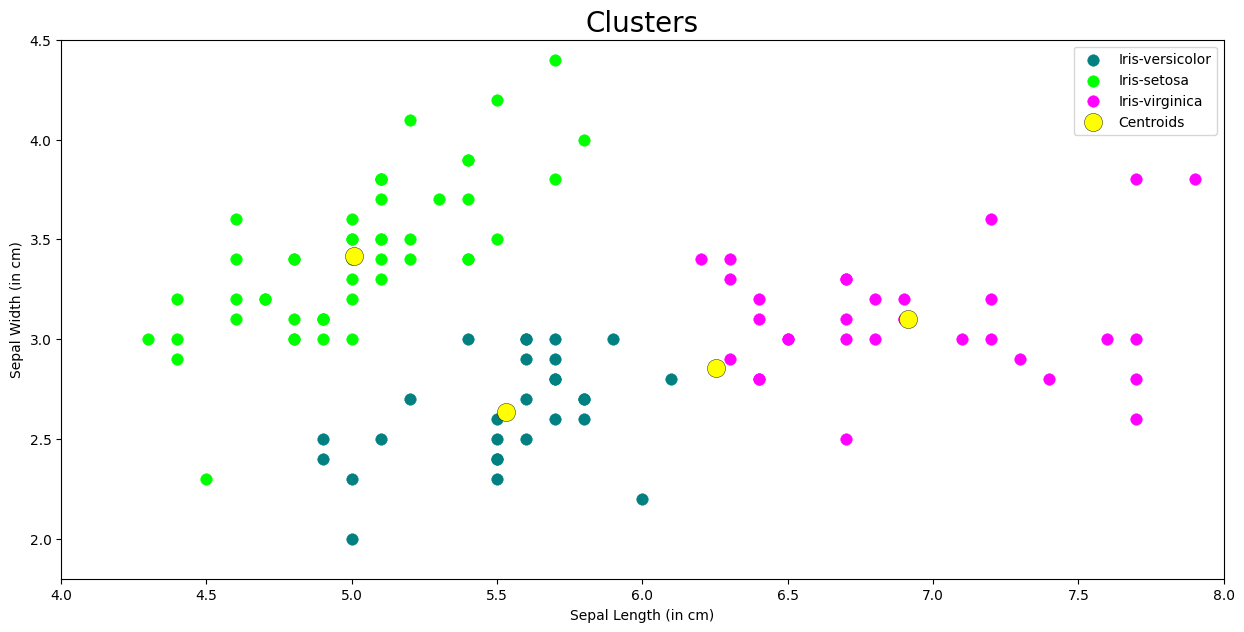

In [166]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['sepal_width'],
            s=70,edgecolor='teal', linewidth=0.3, c='teal', label='Iris-versicolor')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['sepal_width'],
            s=70,edgecolor='lime', linewidth=0.3, c='lime', label='Iris-setosa')


plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['sepal_length'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['sepal_width'],
            s=70,edgecolor='magenta', linewidth=0.3, c='magenta', label='Iris-virginica')

plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 170, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='upper right')
plt.xlim(4,8)
plt.ylim(1.8,4.5)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters', fontsize = 20)
plt.show()

nilai sse dengan 4 centroid

In [167]:
sse = kms.inertia_
sse

57.317873214285726

nilai Silhouette Score dengan 4 centroid

In [ ]:
cluster_labels = kms.predict(X)

silhouette_avg = silhouette_score(X, cluster_labels)
print("Silhouette Score:", )silhouette_avg

Silhouette Score: 0.4978256901095472
